## Final Project - Disease Classifier

For the Final Project, in addidtion to Naive Bayes, a approach with SVM model was also used.

This notebook includes the code for which the SVM model was used to train the data. 

In [15]:
# Importing all the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyttsx3

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 

from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

np.random.seed(0)

import torch
import csv
import torch.optim as optim
import torch.nn as nn
from collections import OrderedDict
from sklearn.metrics import mean_squared_error

In [21]:
# Code Snippet to Ignore and get rid of the Warnings
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Reading in the "dataset.csv" File.
ds = pd.read_csv('./dataset.csv')

# Replacing all the Nan values with a 0 as a place holder
ds.replace(np.nan, 0, inplace=True)

#Replacing all the Symptoms(Strings) into Integers,
#with each of the symptom having a unique integer  ranging from (1 to 134)
for col in ds.columns:
    ds.replace(('itching',' skin_rash',' nodal_skin_eruptions',' continuous_sneezing',' shivering',' chills',
                ' joint_pain',' stomach_pain',' acidity',' ulcers_on_tongue',' muscle_wasting',' vomiting',
                ' burning_micturition',' spotting_ urination',' fatigue',' weight_gain',' anxiety',
                ' cold_hands_and_feets',' mood_swings',' weight_loss',' restlessness',' lethargy',' patches_in_throat',
                ' irregular_sugar_level',' cough',' high_fever',' sunken_eyes',' breathlessness',' sweating',
                ' dehydration',' indigestion',' headache',' yellowish_skin',' dark_urine',' nausea',' loss_of_appetite',
                ' pain_behind_the_eyes',' back_pain',' constipation',' abdominal_pain',' diarrhoea',' mild_fever',
                ' yellow_urine',' yellowing_of_eyes',' acute_liver_failure',' fluid_overload',' swelling_of_stomach',
                ' swelled_lymph_nodes',' malaise',' blurred_and_distorted_vision',' phlegm',' throat_irritation',
                ' redness_of_eyes',' sinus_pressure',' runny_nose',' congestion',' chest_pain',' weakness_in_limbs',
                ' fast_heart_rate',' pain_during_bowel_movements',' pain_in_anal_region',' bloody_stool',
                ' irritation_in_anus',' neck_pain',' dizziness',' cramps',' bruising',' obesity',' swollen_legs',
                ' swollen_blood_vessels',' puffy_face_and_eyes',' enlarged_thyroid',' brittle_nails',
                ' swollen_extremeties',' excessive_hunger',' extra_marital_contacts',' drying_and_tingling_lips',
                ' slurred_speech',' knee_pain',' hip_joint_pain',' muscle_weakness',' stiff_neck',' swelling_joints',
                ' movement_stiffness',' spinning_movements',' loss_of_balance',' unsteadiness',
                ' weakness_of_one_body_side',' loss_of_smell',' badder_discomfort',' foul_smell_of urine',
                ' continuous_feel_of_urine',' passage_of_gases',' internal_itching',' toxic_look_(typhos)',' depression',
                ' irritability',' muscle_pain',' altered_sensorium',' red_spots_over_body',' belly_pain',
                ' abnormal_menstruation',' dischromic _patches',' watering_from_eyes',' increased_appetite',' polyuria',
                ' family_history',' mucoid_sputum',' rusty_sputum',' lack_of_concentration',' visual_disturbances',
                ' receiving_blood_transfusion',' receiving_unsterile_injections',' coma',' stomach_bleeding',
                ' distention_of_abdomen',' history_of_alcohol_consumption',' fluid_overload',' blood_in_sputum',
                ' prominent_veins_on_calf',' palpitations',' painful_walking',' pus_filled_pimples',' blackheads',
                ' scurring',' skin_peeling',' silver_like_dusting',' small_dents_in_nails',' inflammatory_nails',
                ' blister',' red_sore_around_nose',' yellow_crust_ooze',' prognosis',' bladder_discomfort'), 
               (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,22,23,24,25,26,27,28,29,30,31,
                32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,
                66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,
                100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134),
                inplace=True)


In [17]:
##Replacing all the Diseases(Strings) into Integers,
#with each of the disease having a unique integer  ranging from (1 to 41)
ds.Disease.replace(('Fungal infection','Allergy','GERD','Chronic cholestasis','Drug Reaction','Peptic ulcer diseae',
                    'AIDS','Diabetes ','Gastroenteritis','Bronchial Asthma','Hypertension ','Migraine',
                    'Cervical spondylosis','Paralysis (brain hemorrhage)','Jaundice','Malaria','Chicken pox','Dengue',
                    'Typhoid','hepatitis A','Hepatitis B','Hepatitis C','Hepatitis D','Hepatitis E',
                    'Alcoholic hepatitis','Tuberculosis','Common Cold','Pneumonia','Dimorphic hemmorhoids(piles)',
                    'Heart attack','Varicose veins','Hypothyroidism','Hyperthyroidism','Hypoglycemia',
                    'Osteoarthristis','Arthritis','(vertigo) Paroymsal  Positional Vertigo','Acne',
                    'Urinary tract infection','Psoriasis','Impetigo'),
                   (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                    21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41), inplace=True)

In [18]:
# Splitting the Data into X - Inputs (Symptoms) and Y - Output (Disease)
N = ds.shape[1]
X = ds.values[:,1 :N]
Y = ds.iloc[:, 0].values

In [19]:
# Splitting the Data into Training and Validation(Test) set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [20]:
# Initializes evaluation metrics for logistic regression model PCA
k = X.shape[1]
accuracy = np.zeros(k)
precision = np.zeros(k)
recall = np.zeros(k)

In [30]:
# Iterative Training and Evaluation of the Model
acc = 0
K_opt = 0
for i in range(k):
    
    # SVC Regression
    SVCReg = SVC()
    SVCReg.fit(X_train[:, :i + 1], Y_train)
    Y_Pred = SVCReg.predict(X_test[:, :i + 1])

    # Evaluation of the Model for Accuracy, Precision, and Recall
    accuracy[i] = metrics.accuracy_score(Y_test, Y_Pred)
    precision[i] = metrics.precision_score(Y_test, Y_Pred, average = 'weighted')
    recall[i] = metrics.recall_score(Y_test, Y_Pred, average = 'macro')

    if accuracy[i] > acc:
        acc = accuracy[i]
        k_opt = i + 1

In [31]:
# Displays optimal K and corresponding accuracy, precision, and recall
print('Optimal value of K:', k_opt)
print('Accuracy:', acc)
print('Precision:', precision[k_opt - 1])
print('Recall:', recall[k_opt - 1])

Optimal value of K: 11
Accuracy: 0.9359756097560976
Precision: 0.9376190332402164
Recall: 0.9333801773223831


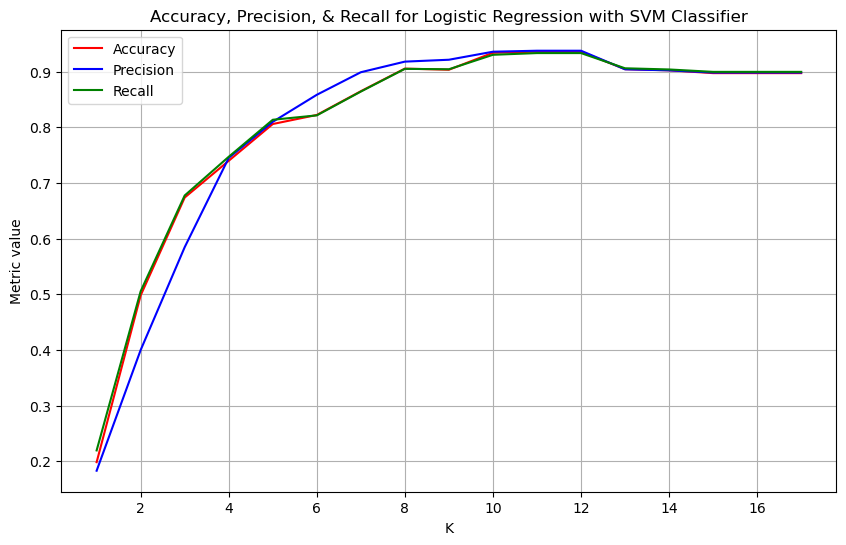

In [32]:
# Plots accuracy, precision, and recall for varying numbers of principal components
plt.figure(3)
plt.plot(np.linspace(1, k, k), accuracy, color='red',
         label='Accuracy')
plt.plot(np.linspace(1, k, k), precision, color='blue',
         label='Precision')
plt.plot(np.linspace(1, k, k), recall, color='green',
         label='Recall')
plt.rcParams['figure.figsize'] = (10, 6)
plt.grid()
plt.xlabel('K')
plt.ylabel('Metric value')
plt.title('Accuracy, Precision, & Recall for Logistic Regression with SVM Classifier')
plt.legend();